# Project 2: More Data, More Visualizations

For this project, the students will:
* find a data set of their choosing
* get approval from the instructor to use that data set
* upon approval, find another (related) data set
* join the new data set with the original one to create an "enriched" data set
* perform an open-ended Exploratory Data Analysis (EDA) on the enriched data set

Regarding the last bullet, "open-ended" means the student chooses the EDA that is performed. The student should have at least three types of data analysis (e.g., mean, standard deviation) and at least three types of graphs (e.g., historgram, bar graph). The student will explain why those variables were chosen for numerical or graphical analysis. Finally, the student will make note of any unusual values for any variable that is analyzed.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [18]:
#import original data
original_data = pd.read_csv("Financial Statements.csv")
original_data.head()
original_data.describe()

,Year,Market Cap(in B USD),Revenue,Gross Profit,Net Income,Earning Per Share,EBITDA,Share Holder Equity,Cash Flow from Operating,Cash Flow from Investing,...,Current Ratio,Debt/Equity Ratio,ROE,ROA,ROI,Net Profit Margin,Free Cash Flow per Share,Return on Tangible Equity,Number of Employees,Inflation Rate(in US)
count,161.000000,160.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,1.610000e+02,161.000000
mean,2015.608696,337.604312,75862.600758,37383.463124,12276.607076,0.982886,20174.023974,57178.005273,20790.317839,-9581.533232,...,2.035368,0.645520,12.432402,7.780479,11.881350,13.684964,0.192825,24.247542,1.457188e+05,2.231317
std,4.049960,541.102812,90786.895983,41669.093697,19417.421119,8.874504,26342.029803,54098.208311,27300.212516,16196.808177,...,1.660894,2.507177,44.777292,8.802462,93.384692,13.401767,15.412788,109.982817,2.234389e+05,1.959139
min,2009.000000,0.040000,3326.445000,1174.269000,-12244.000000,-90.480000,-6860.000000,-8210.300000,-39392.270000,-59611.000000,...,0.220500,-11.775000,-212.606900,-23.723600,-742.105200,-44.696100,-121.502200,-554.174100,5.420000e+03,-0.355500
25%,2012.000000,41.155000,22820.400000,10396.000000,844.000000,0.340000,2310.000000,12353.000000,3502.000000,-17434.000000,...,1.000000,0.077200,5.080000,0.828200,2.757900,4.827700,-0.361300,6.111800,2.990000e+04,1.261600
50%,2016.000000,113.140000,45992.040000,19561.000000,4757.800000,1.790000,9958.000000,47791.000000,7386.700000,-5904.000000,...,1.341200,0.381800,14.501600,6.641100,13.469400,15.297700,0.265600,19.782200,9.600000e+04,1.812200
75%,2019.000000,357.107500,77849.000000,47722.000000,14136.000000,3.240000,27765.000000,91570.700000,31626.000000,-981.600000,...,2.473400,0.891400,28.189300,14.701600,20.472300,22.934500,0.935400,36.980600,1.470000e+05,2.442600
max,2023.000000,2913.280000,513983.000000,225152.000000,99803.000000,14.980000,130541.000000,256144.000000,122151.000000,49749.000000,...,10.617800,9.332800,196.958900,31.154100,884.860500,36.686300,137.328700,1197.727000,1.608000e+06,8.002800


In [19]:
#import new data
new_data = pd.read_csv('Financials.csv')
new_data.head()
new_data.describe()


,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


In [20]:
# Merge the datasets based on the common key
enriched_data = pd.merge(original_data, new_data, on='Year', how='inner')
print(enriched_data.info())
print(enriched_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8225 entries, 0 to 8224
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 8225 non-null   int64  
 1   Company                              8225 non-null   object 
 2   Category                             8225 non-null   object 
 3   Market Cap(in B USD)                 7700 non-null   float64
 4   Revenue                              8225 non-null   float64
 5   Gross Profit                         8225 non-null   float64
 6   Net Income                           8225 non-null   float64
 7   Earning Per Share                    8225 non-null   float64
 8   EBITDA                               8225 non-null   float64
 9   Share Holder Equity                  8225 non-null   float64
 10  Cash Flow from Operating             8225 non-null   float64
 11  Cash Flow from Investing      

In [21]:
# Save the enriched
enriched_data.to_csv('enriched_dataset.csv', index=False)

In [22]:
numerical_columns = enriched_data.select_dtypes(include=[np.number]).columns
exclude_columns = ['Year','Month Number']
# Remove excluded columns from the analysis
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [23]:
# Mean
means = enriched_data[numerical_columns].mean()
print(means)


Market Cap(in B USD)                      175.848864
Revenue                                 56812.678702
Gross Profit                            27545.814532
Net Income                               8470.150596
Earning Per Share                           0.782511
EBITDA                                  14760.361217
Share Holder Equity                     53023.433979
Cash Flow from Operating                11339.235574
Cash Flow from Investing                -6323.103234
Cash Flow from Financial Activities     -6103.295149
Current Ratio                               2.022434
Debt/Equity Ratio                           0.966230
ROE                                         9.621926
ROA                                         6.281217
ROI                                         8.177251
Net Profit Margin                          11.851389
Free Cash Flow per Share                    0.332111
Return on Tangible Equity                  49.103249
Number of Employees                    120924.

In [24]:
# Median
medians = enriched_data[numerical_columns].median()
print(medians)

Market Cap(in B USD)                      108.4800
Revenue                                 52708.0000
Gross Profit                            21915.0000
Net Income                               4757.8000
Earning Per Share                           1.4200
EBITDA                                   9593.7010
Share Holder Equity                     55865.0000
Cash Flow from Operating                 5865.0000
Cash Flow from Investing                -4714.0000
Cash Flow from Financial Activities     -2087.0000
Current Ratio                               1.3224
Debt/Equity Ratio                           0.3164
ROE                                         9.8734
ROA                                         6.0682
ROI                                         7.5468
Net Profit Margin                          11.6899
Free Cash Flow per Share                    0.0651
Return on Tangible Equity                  16.2814
Number of Employees                    106700.0000
Inflation Rate(in US)          

In [25]:
#Standard Deviation
std_devs = enriched_data[numerical_columns].std()
print(std_devs)


Market Cap(in B USD)                      184.251925
Revenue                                 45731.547071
Gross Profit                            20978.010247
Net Income                              11537.243136
Earning Per Share                           4.271091
EBITDA                                  17015.476567
Share Holder Equity                     45267.244633
Cash Flow from Operating                19644.662073
Cash Flow from Investing                12752.985176
Cash Flow from Financial Activities     10585.259289
Current Ratio                               1.518842
Debt/Equity Ratio                           1.468276
ROE                                        20.907196
ROA                                         7.020664
ROI                                        12.373381
Net Profit Margin                           9.585452
Free Cash Flow per Share                    2.164338
Return on Tangible Equity                 171.354353
Number of Employees                    111201.

c:\Users\avata\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\avata\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


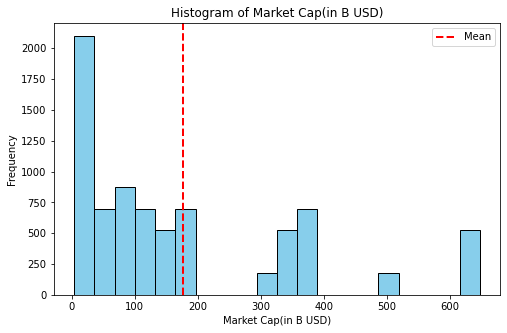

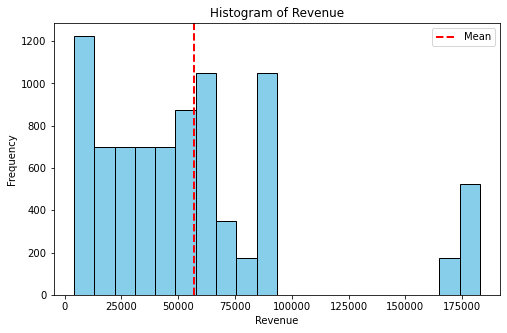

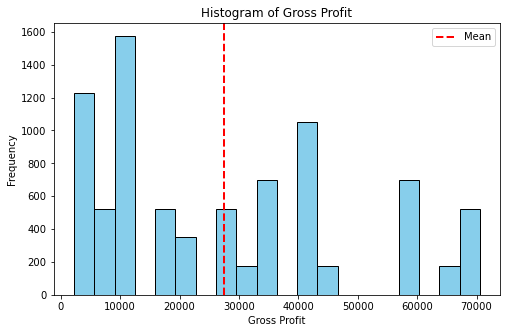

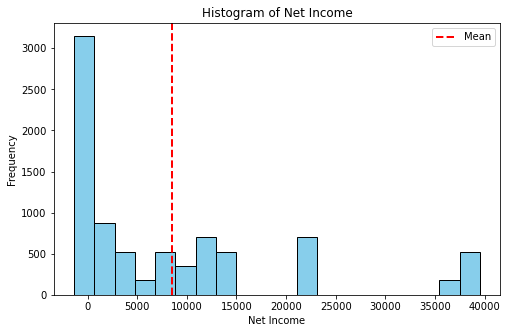

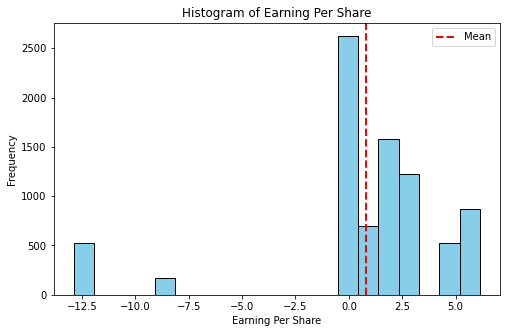

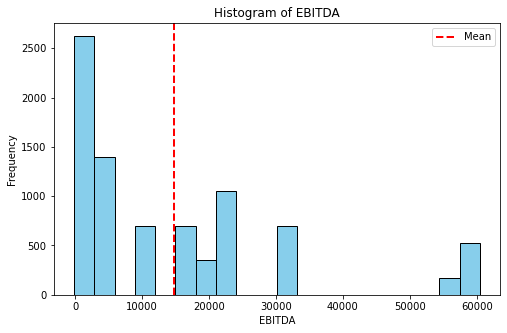

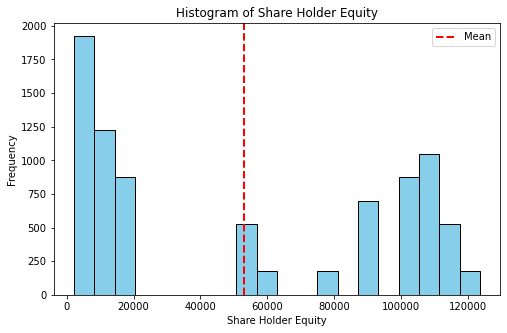

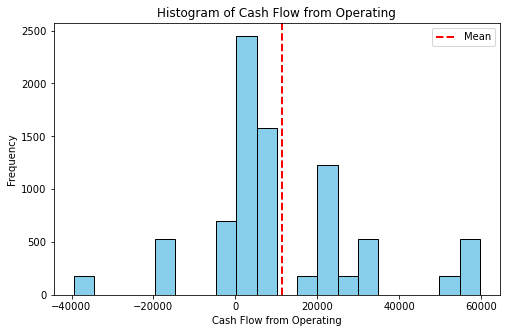

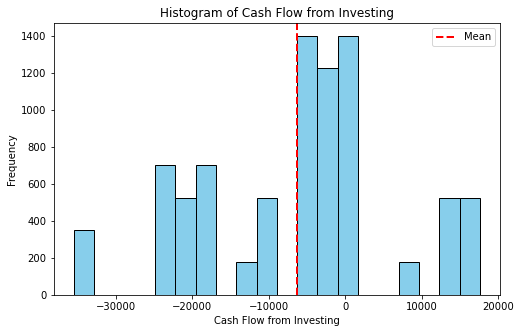

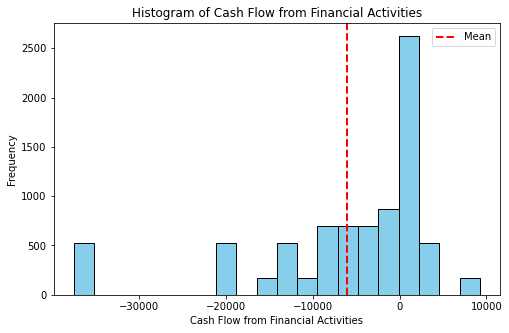

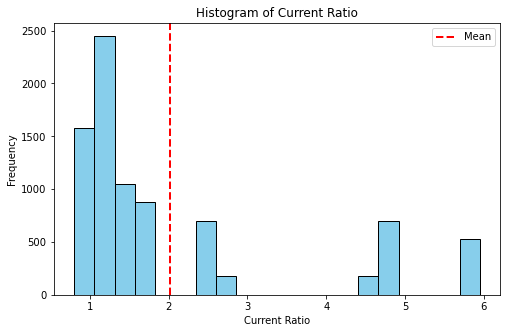

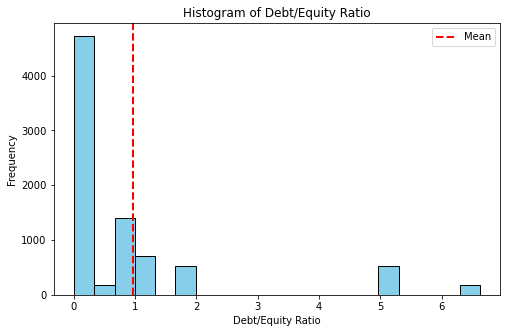

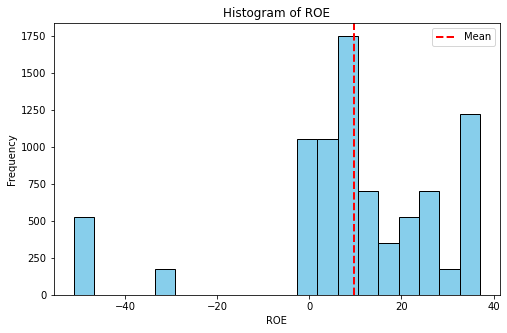

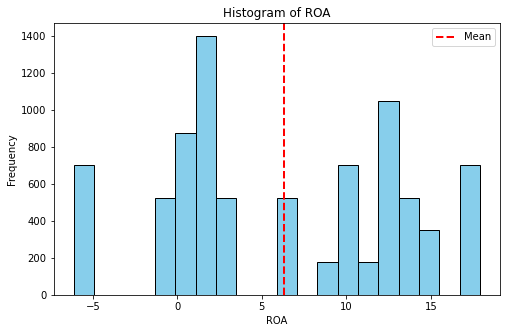

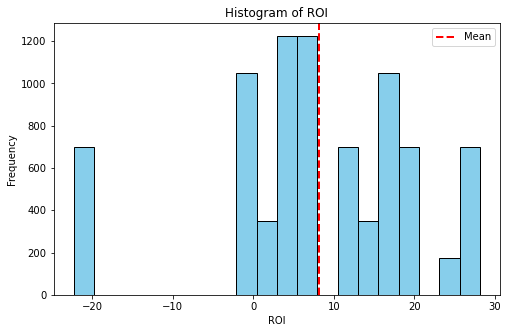

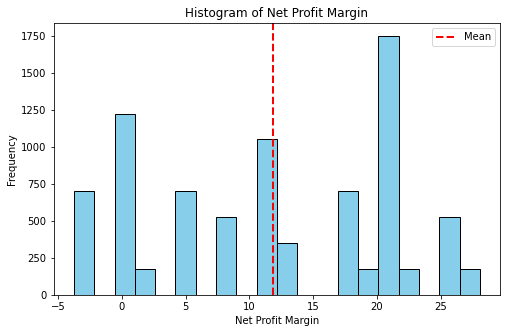

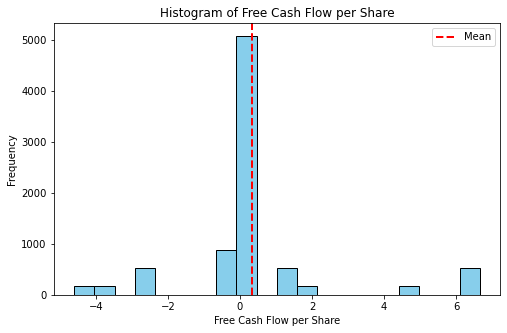

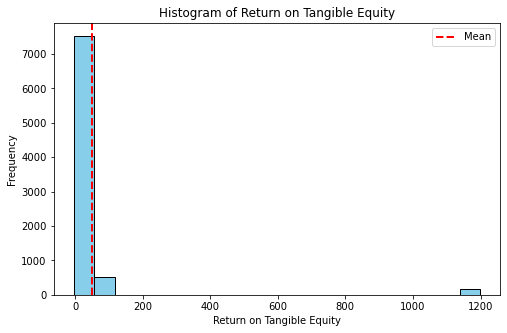

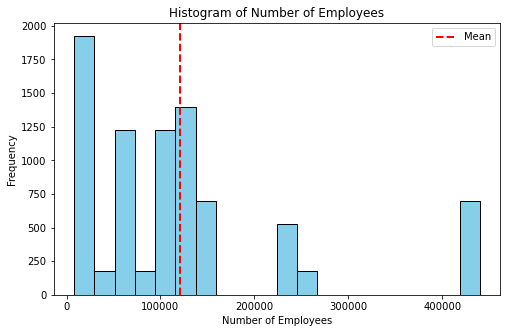

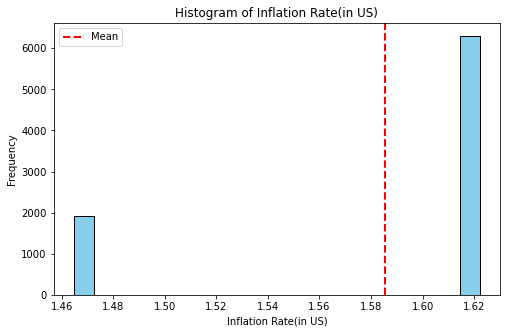

In [26]:
# Graphical Analysis
for column in numerical_columns:
    # Histogram
    plt.figure(figsize=(8, 5))
    plt.axvline(enriched_data[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.hist(enriched_data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


c:\Users\avata\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\avata\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\avata\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Users\avata\anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


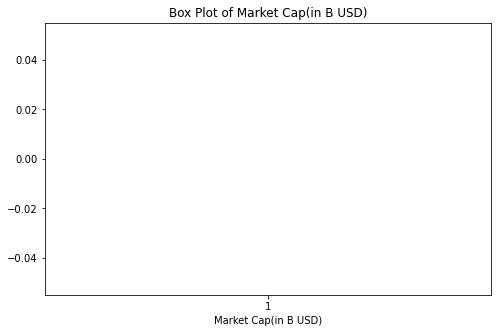

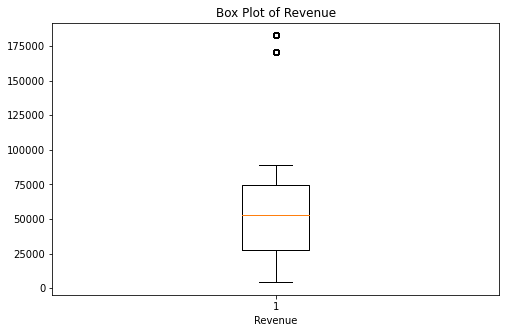

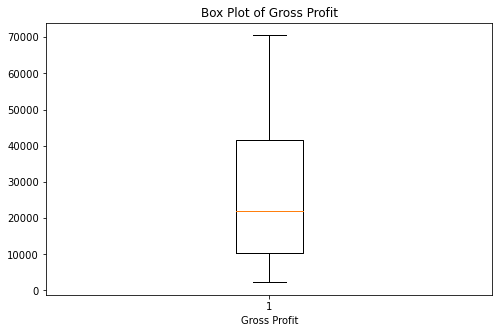

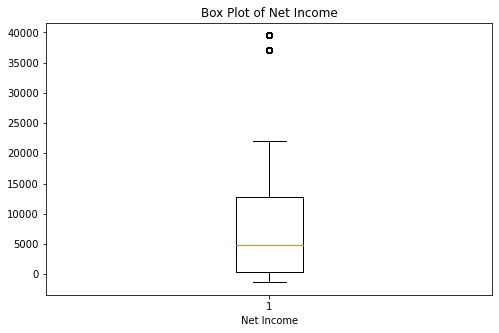

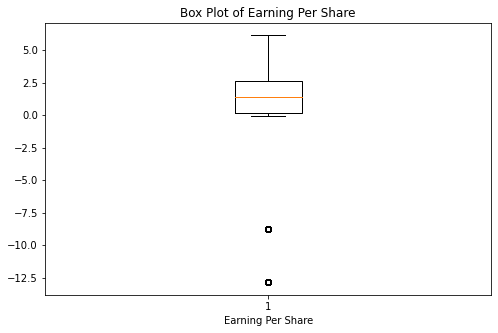

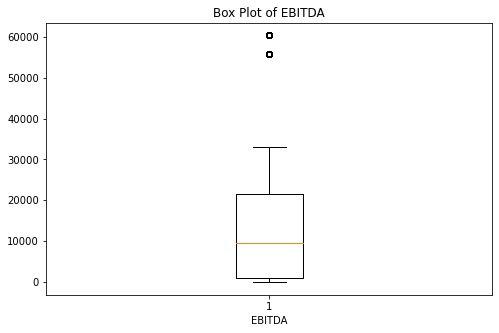

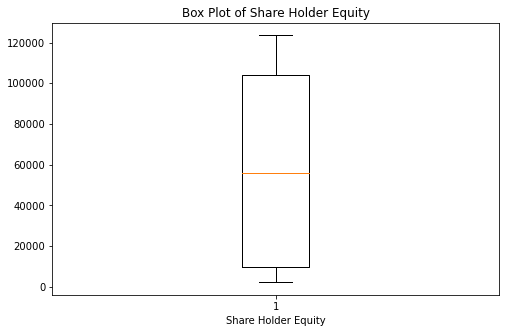

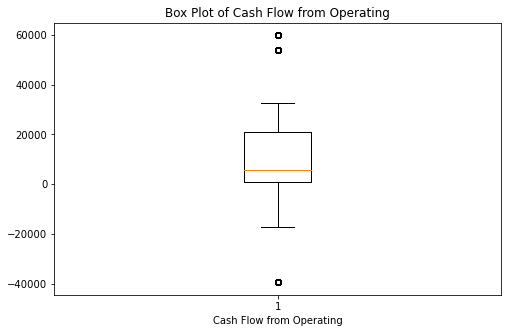

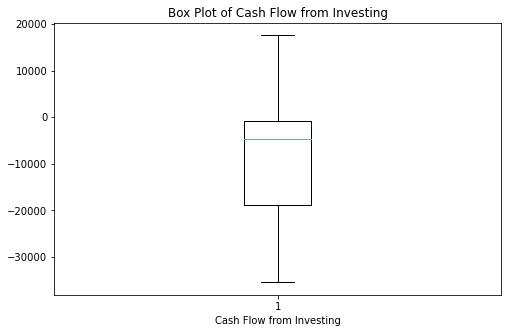

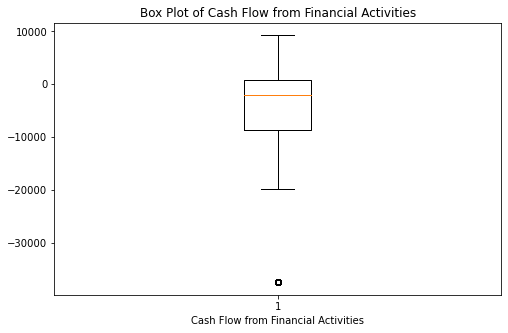

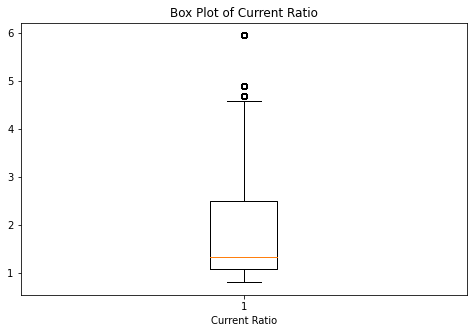

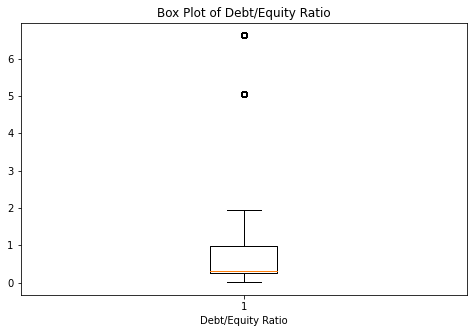

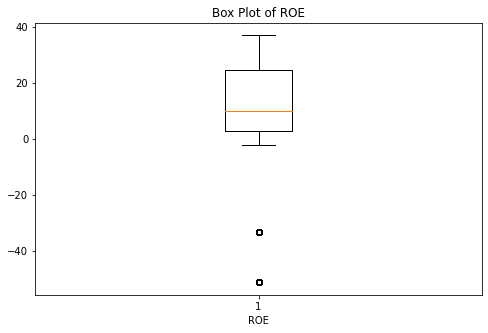

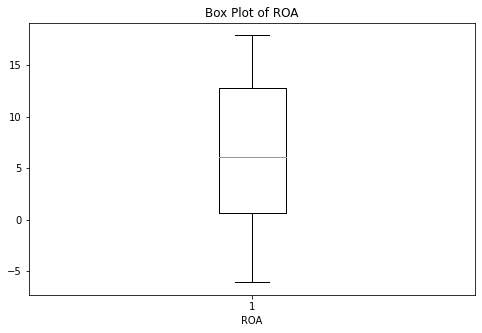

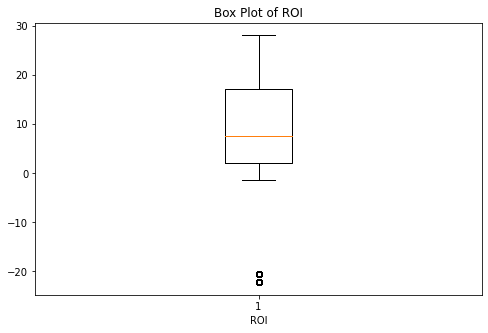

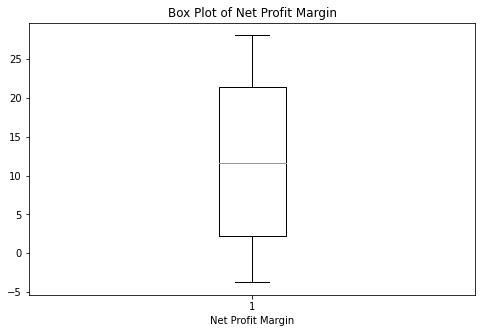

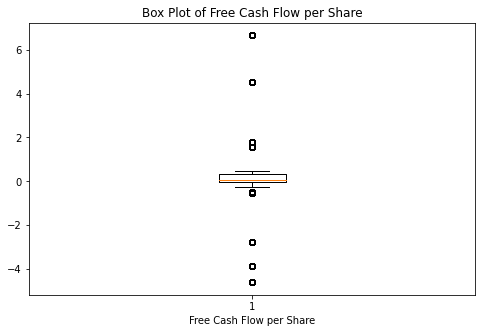

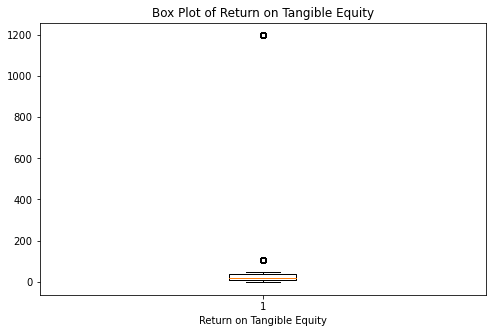

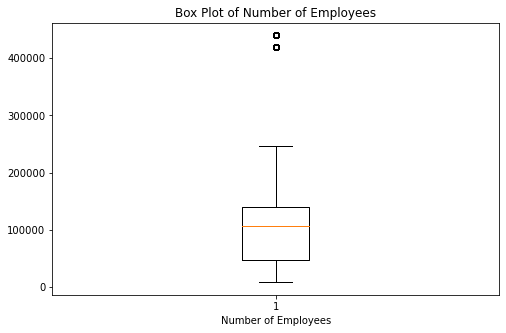

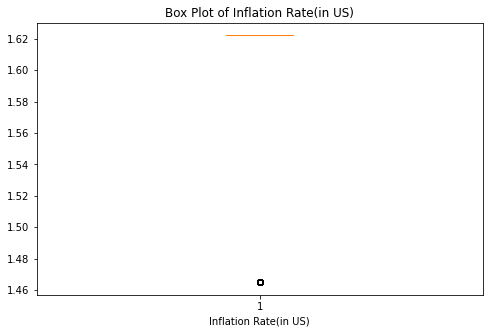

In [27]:
for column in numerical_columns:
# Box Plot
    plt.figure(figsize=(8, 5))
    plt.boxplot(enriched_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

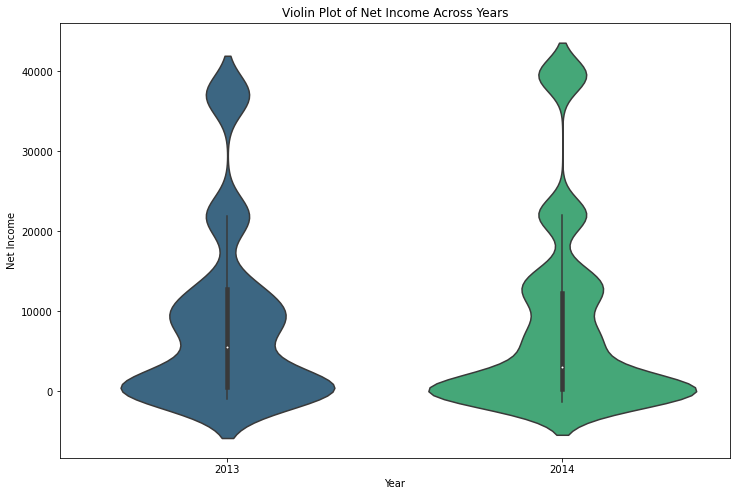

In [28]:
#Violin Plot for Net Income Across Years
plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Net Income', data=enriched_data, palette='viridis')
plt.title('Violin Plot of Net Income Across Years')
plt.xlabel('Year')
plt.ylabel('Net Income')
plt.show()

<Figure size 864x576 with 0 Axes>

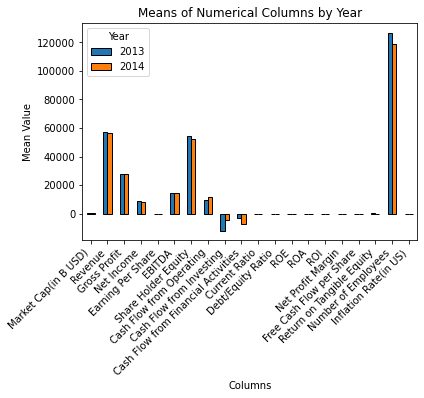

In [29]:
means_by_year = enriched_data.groupby('Year')[numerical_columns].mean()

# Plot bar graph for means by year
plt.figure(figsize=(12, 8))
means_by_year.T.plot(kind='bar', edgecolor='black')
plt.title('Means of Numerical Columns by Year')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.show()

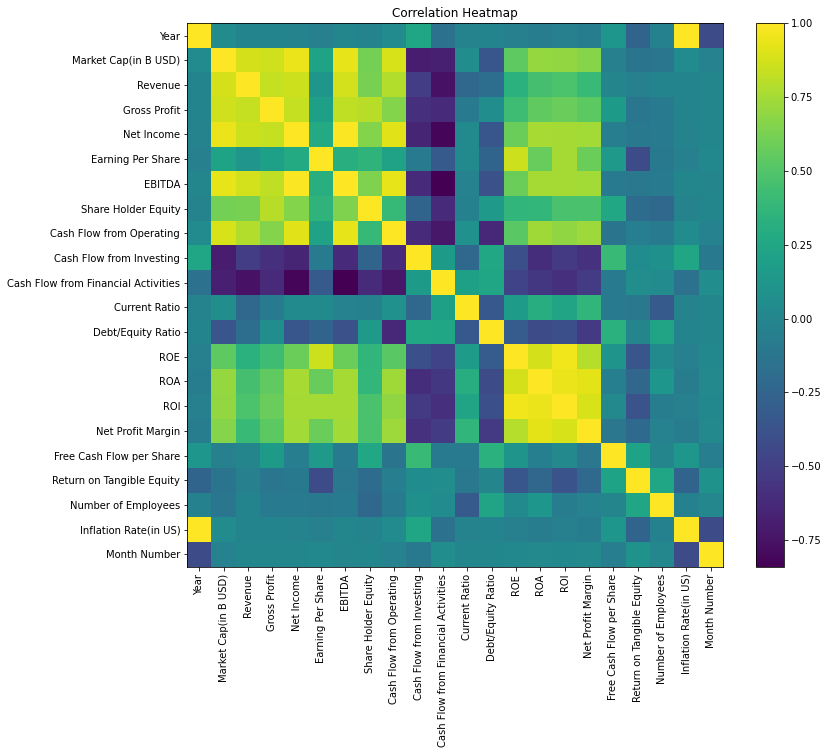

In [30]:
# Correlation heatmap
correlation_matrix = enriched_data.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

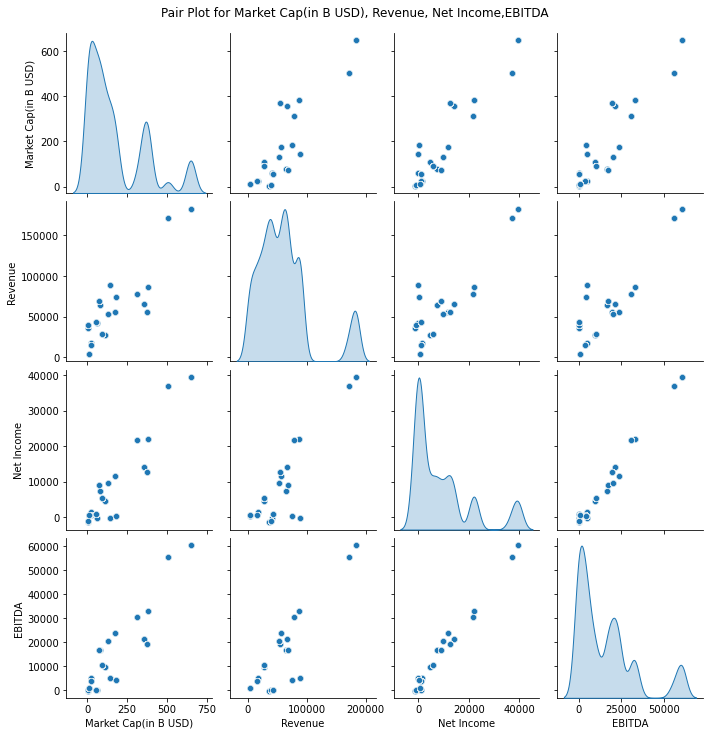

In [34]:
#Pair plot for selected variables
selected_variables = ['Market Cap(in B USD)', 'Revenue', 'Net Income', 'EBITDA']
sns.pairplot(enriched_data[selected_variables].dropna(), diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot for Market Cap(in B USD), Revenue, Net Income,EBITDA', y=1.02)
plt.show()
